<a href="https://colab.research.google.com/github/rpasquini/econometria-iae/blob/main/OLS_2_Ajuste_Propiedades_Test_de_Hip%C3%B3tesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

El objetivo de este notebook es introducir a la estimación del modelo de regresión lineal, y aplicar conceptos relacionados con predicción y análisis de residuos estimados

Nuestro primer objetivo será estimar el modelo:

$$ ingreso_i=\beta_0+\beta_1 aesc_i+\epsilon_i $$

donde ingreso es el ingreso total individual y aesc son los años de escolaridad.


In [41]:
df=pd.read_csv('https://github.com/rpasquini/econometria-iae/blob/main/datos/eah2022_bu_ampliada_ind.txt?raw=true',sep=';')

In [42]:
df

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentes_2,p5_2,p6_a,...,t50d_a,t50d_b,t50d_c,t50d_d,t50d_e,t50d_f,t51_d,t23_1_cod,t24_1_cod,fexp
0,1,1,1,8,3,18,2,1,6,3,...,0,0,0,0,0,0,0,0,0,16
1,1,1,2,8,3,22,1,7,6,3,...,0,0,0,0,0,0,0,0,0,16
2,1,1,3,8,3,45,1,6,3,0,...,0,0,0,0,0,0,0,0,0,16
3,2,1,1,5,4,18,2,1,6,95,...,0,0,0,0,0,0,0,0,0,357
4,3,1,1,2,4,18,1,1,6,95,...,0,0,0,0,0,0,0,0,0,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12496,5373,1,1,8,4,95,2,1,4,0,...,0,0,0,0,0,0,0,0,0,40
12497,5374,1,1,7,4,98,2,1,4,0,...,0,0,0,0,0,0,0,0,0,205
12498,5374,1,2,7,4,76,2,7,3,0,...,0,0,0,0,0,0,0,0,0,205
12499,5375,1,1,15,4,100,2,1,4,0,...,0,0,0,0,0,0,0,0,0,165


In [43]:
df.columns

Index(['id', 'nhogar', 'miembro', 'comuna', 'dominio', 'edad', 'sexo',
       'parentes_2', 'p5_2', 'p6_a',
       ...
       't50d_a', 't50d_b', 't50d_c', 't50d_d', 't50d_e', 't50d_f', 't51_d',
       't23_1_cod', 't24_1_cod', 'fexp'],
      dtype='object', length=140)

In [44]:
df['ingreso']=df['ingtot_2']

In [45]:
df=df[df['ingreso']>0]

In [46]:
df['ingreso'].describe()

count    9.105000e+03
mean     1.294673e+05
std      1.175164e+05
min      5.000000e+02
25%      5.030000e+04
50%      1.000000e+05
75%      1.700000e+05
max      2.000000e+06
Name: ingreso, dtype: float64

<Axes: >

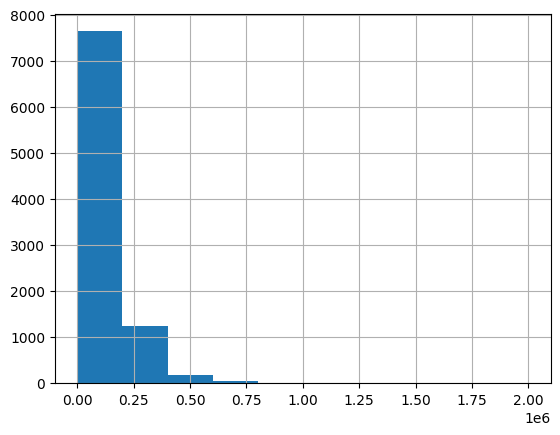

In [47]:
df['ingreso'].hist()

In [48]:
df['aesc']

0        11
1        12
2         9
3        12
4        12
         ..
12496     0
12497     3
12498     3
12499     7
12500    12
Name: aesc, Length: 9105, dtype: int64

In [49]:
df['aesc'].describe()

count    9105.000000
mean       13.584734
std         6.957779
min         0.000000
25%        12.000000
50%        13.000000
75%        17.000000
max        99.000000
Name: aesc, dtype: float64

In [50]:
df=df.loc[df.aesc<90]

<Axes: >

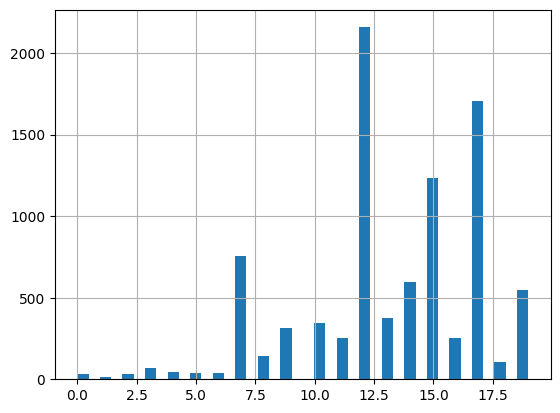

In [51]:
df.aesc.hist(bins=40)

Estimar la regresion va a requerir varios pasos que me tengo que asegurar que se cumplan:

1. Asegurarme de que los datos (las filas en cuestion) que voy a estar usando no tienen datos missing en ninguna variable.
2. Separar a la variable a explicar (dependiente) de la(s) explicativas
3. Si la regresión va a tener una constante, como en nuestro caso, agregar a las variables explicativas una columna de 1s (unos).
4. Definir el modelo en una variable sm.OLS
5. Correr el modelo con el metodo fit() y guardar los resultados en otra variable
6. Imprimir los resultados en pantalla (imprimir los contenidos de la variable del paso anterior)

# Altenativa 1:
Defino el modelo con sm.OLS
Agrego la constante usando sm.add_constant
Uso la opción "drop" para eliminar filas con missing values

In [52]:
modelo=sm.OLS(df['ingreso'],sm.add_constant(df['aesc']), missing='drop')


In [53]:
resultados=modelo.fit()
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                ingreso   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     1930.
Date:                Mon, 23 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:42:38   Log-Likelihood:            -1.1779e+05
No. Observations:                9062   AIC:                         2.356e+05
Df Residuals:                    9060   BIC:                         2.356e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.489e+04   4129.920    -10.868      0.0

# Alternativa 2: Usando sintaxis de estilo R
* Por default agrega la constante
* Por defaul elimina los missing

In [54]:
import statsmodels.formula.api as smf

In [55]:
mod = smf.ols(formula='ingreso ~ aesc', data=df, )

res = mod.fit()

print(res.summary())



                            OLS Regression Results                            
Dep. Variable:                ingreso   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     1930.
Date:                Mon, 23 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:42:38   Log-Likelihood:            -1.1779e+05
No. Observations:                9062   AIC:                         2.356e+05
Df Residuals:                    9060   BIC:                         2.356e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.489e+04   4129.920    -10.868      0.0

In [56]:
resultados.params['aesc']

13249.928839499735

### Missing values

Una manera alternativa de eliminar filas con missing values es utilizando el metodo dropna()

In [57]:
dfmodel=df[['ingreso','aesc']].dropna()

# Predicción

$\hat{Y}=\hat{\beta_0}+\hat{\beta_1}*X$

In [58]:
# 10 años de escolaridad
-4.489e+04+1.325e+04*10

87610.0

In [59]:
# 10 años de escolaridad levantando los parametros de los resultados del ajuste
resultados.params['const']+resultados.params['aesc']*10

87614.1083950932

In [60]:
# Predicciones para observaciones en la data
resultados.params['const']+resultados.params['aesc']*dfmodel.aesc

0        100864.037235
1        114113.966074
2         74364.179556
3        114113.966074
4        114113.966074
             ...      
12496    -44885.180000
12497     -5135.393481
12498     -5135.393481
12499     47864.321877
12500    114113.966074
Name: aesc, Length: 9062, dtype: float64

In [61]:
resultados.predict()

array([100864.03723459, 114113.96607409,  74364.17955559, ...,
        -5135.3934814 ,  47864.32187659, 114113.96607409])

In [62]:
resultados.predict()

array([100864.03723459, 114113.96607409,  74364.17955559, ...,
        -5135.3934814 ,  47864.32187659, 114113.96607409])

In [63]:
dfmodel.ingreso-resultados.predict()

0        -77364.037235
1       -106113.966074
2         15635.820444
3        -74113.966074
4        -94113.966074
             ...      
12496    130885.180000
12497     86135.393481
12498     49635.393481
12499     62135.678123
12500    -39113.966074
Name: ingreso, Length: 9062, dtype: float64

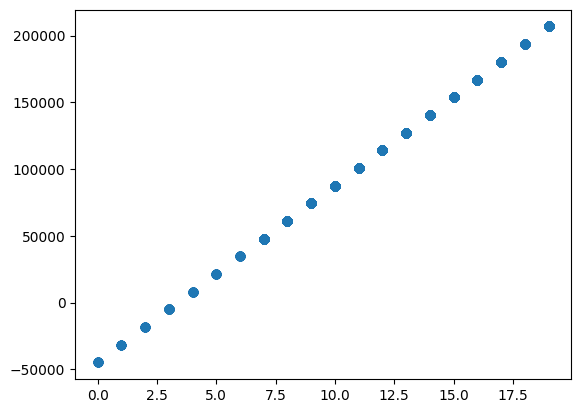

In [64]:
# Ploteamos prediccion con matplolib
plt.scatter(dfmodel.aesc, resultados.predict())

Text(0.5, 1.0, 'Data y valores ajustados')

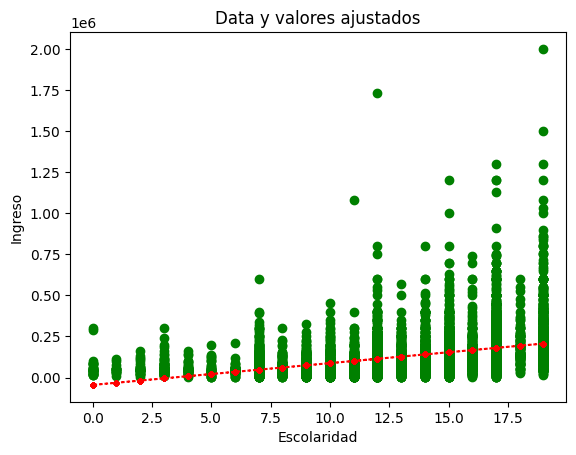

In [65]:
plt.scatter(dfmodel.aesc, dfmodel.ingreso, color='green')

plt.plot(dfmodel.aesc, resultados.predict(), color= "red", marker='.', linestyle=':')

plt.xlabel('Escolaridad')

plt.ylabel('Ingreso')

plt.title('Data y valores ajustados')

#plt.ylim(0,15)


In [66]:
resultados.predict()

array([100864.03723459, 114113.96607409,  74364.17955559, ...,
        -5135.3934814 ,  47864.32187659, 114113.96607409])

# Error Cuadrático Medio


In [67]:
resultados.mse_resid

11415526141.572683

Error Cuadrático Medio (MSE) a mano

$MSE=\sqrt{\frac{\sum^n_{i=1} e_i^2}{n-2}}$ donde

$e=y-\hat{y}$



In [68]:
ypred = resultados.predict()
residuos=dfmodel['ingreso']-ypred
rss=np.sum(residuos**2)
MSE=(rss/(resultados.nobs-2))
MSE

11415526141.57268

In [69]:
MSE**0.5

106843.46560072206

# Cómo son los residuos (errores estimados) en mis datos?


<Axes: >

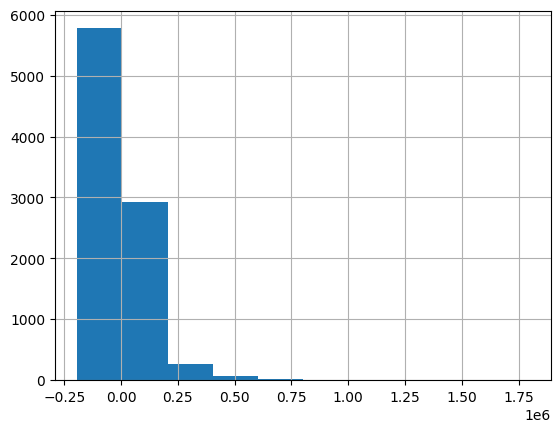

In [70]:
residuos.hist()

In [71]:
import matplotlib.pyplot as plt
import statsmodels.api as sm


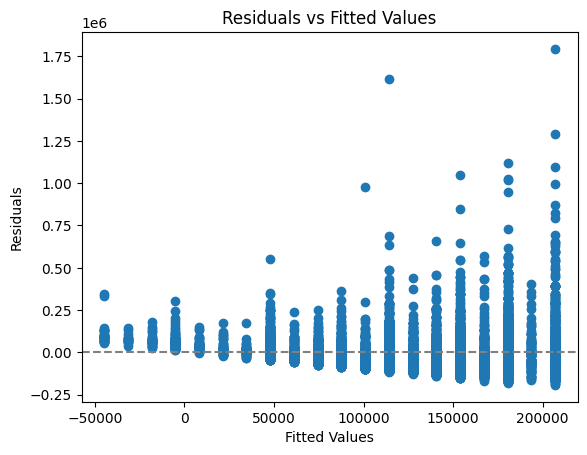

In [72]:
# Assuming 'res' is your fitted regression model
residuals = res.resid
fitted_values = res.fittedvalues

plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(y=0, color='gray', linestyle='--')  # Add horizontal line at y=0
plt.show()

## Test de White
Utilizamos p-value del LM-Test  que es el  p-value para la hipotesis nula de que la varianza del error es homocedastica


In [73]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip

# Assuming 'model' is your fitted regression model
white_test_results = het_white(res.resid, res.model.exog)

print("White Test Results:")
print("LM Statistic:", white_test_results[0])
print("LM-Test p-value:", white_test_results[1])


White Test Results:
LM Statistic: 150.3665607670011
LM-Test p-value: 2.2300582033825483e-33


# Estimación Regresion con varianza robusta

Para los ajustes a los errores estándares por heterocedasticidad, usamos los errores robustos tipicamente denotados HC0-HC3
https://jslsoc.sitehost.iu.edu/files_research/testing_tests/hccm/00TAS.pdf

In [74]:
mod = smf.ols(formula='ingreso ~ aesc', data=df, )

res = mod.fit(cov_type='HC0')

print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                ingreso   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     1609.
Date:                Mon, 23 Oct 2023   Prob (F-statistic):          4.94e-324
Time:                        20:42:39   Log-Likelihood:            -1.1779e+05
No. Observations:                9062   AIC:                         2.356e+05
Df Residuals:                    9060   BIC:                         2.356e+05
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.489e+04   3867.026    -11.607      0.0

In [75]:
mod = smf.ols(formula='ingreso ~ aesc', data=df, )

res = mod.fit(cov_type='HC1')

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                ingreso   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     1609.
Date:                Mon, 23 Oct 2023   Prob (F-statistic):          4.94e-324
Time:                        20:42:40   Log-Likelihood:            -1.1779e+05
No. Observations:                9062   AIC:                         2.356e+05
Df Residuals:                    9060   BIC:                         2.356e+05
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.489e+04   3867.453    -11.606      0.0

# Revisamos el supuesto de normalidad

<Axes: >

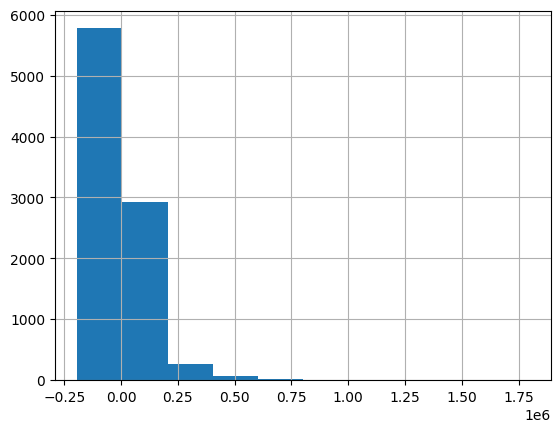

In [76]:
residuos.hist()

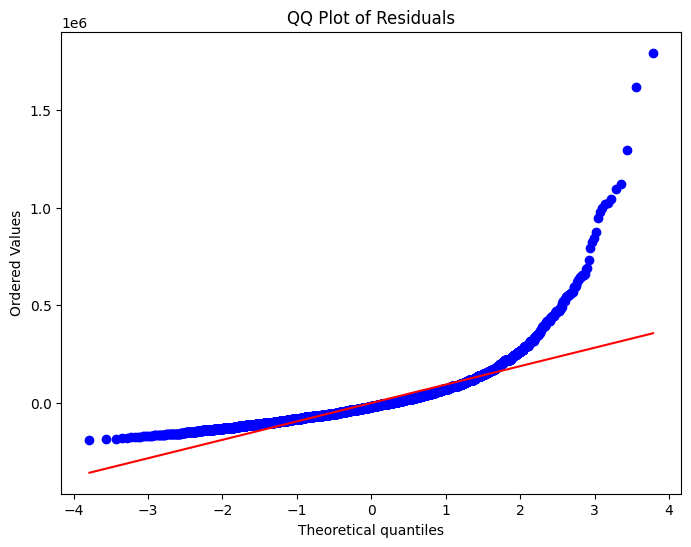

In [77]:
import scipy.stats as stats
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title('QQ Plot of Residuals')
plt.show()

### Shapiro-Wilk Normality Test
La hipótesis nula es la normalidad de la distribución


In [78]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test
stat, p = shapiro(residuals)

# Print the test statistic and the p-value
print("Test Statistic:", stat)
print("P-Value:", p)

# Interpret the result
alpha = 0.05  # Significance level
if p > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

Test Statistic: 0.7791448831558228
P-Value: 0.0
Sample does not look Gaussian (reject H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [80]:
df['logingreso']=np.where(df['ingtot_2']>0,np.log(df['ingtot_2']),np.nan)

In [81]:
mod = smf.ols(formula='logingreso ~ aesc', data=df, )

res = mod.fit(cov_type='HC1')

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             logingreso   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     2373.
Date:                Mon, 23 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:45:16   Log-Likelihood:                -10880.
No. Observations:                9062   AIC:                         2.176e+04
Df Residuals:                    9060   BIC:                         2.178e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9699      0.032    310.331      0.0

<Axes: >

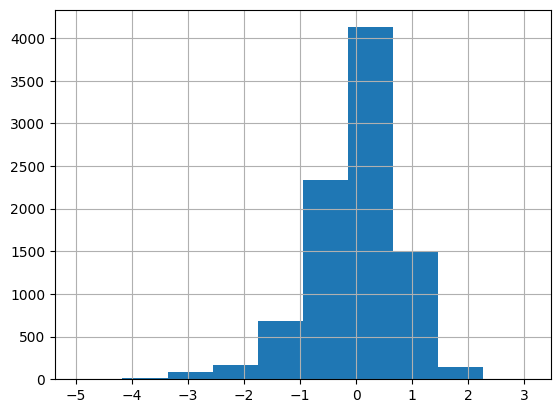

In [83]:
res.resid.hist()

In [85]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test
stat, p = shapiro(res.resid)

# Print the test statistic and the p-value
print("Test Statistic:", stat)
print("P-Value:", p)

# Interpret the result
alpha = 0.05  # Significance level
if p > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

Test Statistic: 0.9568549394607544
P-Value: 1.401298464324817e-45
Sample does not look Gaussian (reject H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


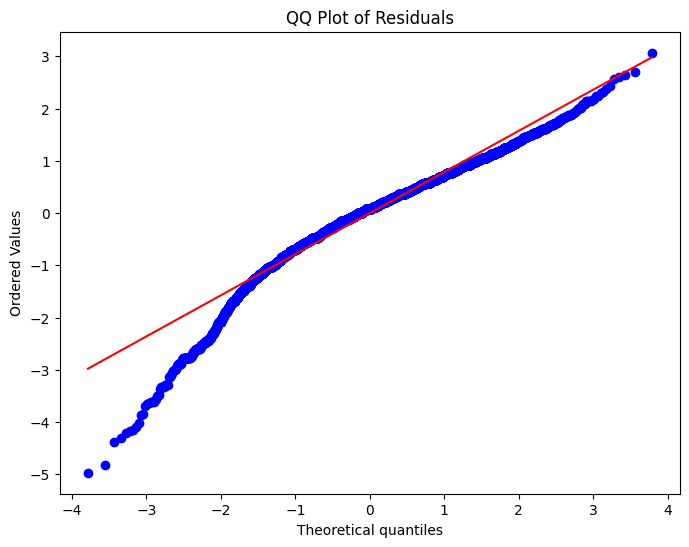

In [84]:
import scipy.stats as stats
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(res.resid, dist="norm", plot=ax)
ax.set_title('QQ Plot of Residuals')
plt.show()